In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from shapely.geometry import Point
from uatk_spc.builder import Builder
from uatk_spc.reader import Reader

# Validate the employment data in SPC and compare with Business Register and Employment Survey data

In this section, we are validating the SPC dataset with the Business Register and Employment Survey dataset, the BRES data is avaliable on the nomis website: https://www.nomisweb.co.uk/query/construct/summary.asp?mode=construct&version=0&dataset=189

This section link to the github PR [#27](https://github.com/Urban-Analytics-Technology-Platform/acbm/issues/27)
### What to do 

* Check if the total amount of the workplace assigned and the percentage in the SPC dataset
* Check if the distribution of SIC code for SPC dataset and BRES dataset can be matched with each other

<Axes: >

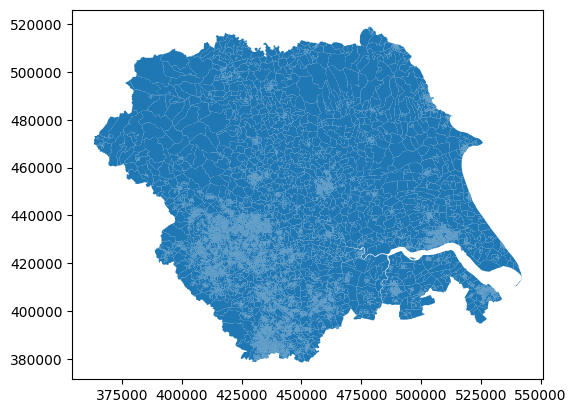

In [2]:
boundaries = gpd.read_file('../data/external/boundaries/oa_england.geojson')
Yorkshire_and_Humber_boundaries=boundaries[boundaries["rgn22nm"]=="Yorkshire and The Humber"]
Yorkshire_and_Humber_boundaries.plot()

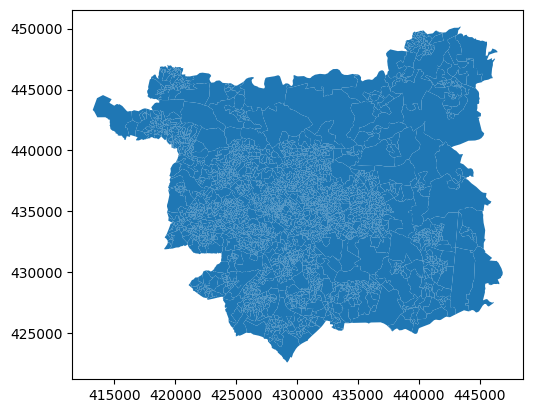

In [3]:
Leeds_boundaries = boundaries[boundaries['MSOA21NM'].str.contains("Leeds", na=False)]
Leeds_boundaries.plot()
#Leeds_boundaries.to_file('../data/external/boundaries/oa_leeds.geojson',driver="GeoJSON")
Leeds_list=Leeds_boundaries.MSOA21CD.unique()

In [4]:
#boundaries = gpd.read_file('../data/external/boundaries/oa_leeds.geojson')
#boundaries.plot()

In [5]:
# Load the SPC data

path = "../data/external/spc_output_no_sic_code_matching/raw/"
region = "west-yorkshire"

spc_people_hh = (
    Builder(path, region, backend="pandas", input_type="parquet")
    .add_households()
    .unnest(["health", "employment", "details", "demographics"], rsuffix="_household")
    .build()
)

In [6]:
# Filter the SPC data to only include Leeds MSOAs
leeds_spc_people_hh=spc_people_hh[spc_people_hh.msoa11cd.isin(Leeds_list)]
leeds_spc_people_hh

,id,household,workplace,events,weekday_diaries,weekend_diaries,orig_pid,id_tus_hh,id_tus_p,pid_hs,...,accommodation_type,communal_type,num_rooms,central_heat,tenure,num_cars,sex,age_years,ethnicity,nssec8_household
1192981,1192981,479310,NaN,"{'sport': 0.23899999260902405, 'rugby': 0.3011...","[954, 1037, 1234, 2981, 6290, 9535, 10385, 106...","[955, 1036, 1235, 2980, 6291, 9536, 10384, 106...",E02002330_0001_001,34051017,1,2911721,...,2.0,NaN,6.0,True,2.0,2,1,68,1,1.0
1192982,1192982,479310,NaN,"{'sport': 0.23899999260902405, 'rugby': 0.0884...","[3435, 6069, 13203, 14704]","[3436, 6068, 13202, 14703]",E02002330_0001_002,21040818,1,2904618,...,2.0,NaN,6.0,True,2.0,2,2,65,1,6.0
1192983,1192983,479311,NaN,"{'sport': 0.09000000357627869, 'rugby': 0.1133...","[762, 5168, 6201, 8977]","[761, 5169, 6200, 8976]",E02002330_0002_001,11131017,1,2902311,...,1.0,NaN,5.0,True,1.0,2,1,86,1,2.0
1192984,1192984,479312,NaN,"{'sport': 0.2680000066757202, 'rugby': 0.16884...","[1580, 5417, 5956, 12901]","[1581, 5416, 5957, 12900]",E02002330_0003_001,15020311,1,2911131,...,1.0,NaN,6.0,True,2.0,1,1,58,1,4.0
1192985,1192985,479312,41330.0,"{'sport': 0.2680000066757202, 'rugby': 0.19832...","[318, 3145, 10496, 12819, 13943]","[319, 3144, 10495, 12818, 13942]",E02002330_0003_002,20090607,1,2909582,...,1.0,NaN,6.0,True,2.0,1,2,56,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339926,2339926,963456,83347.0,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[253, 904, 960, 1258, 1666, 1827, 2990, 3158, ...","[252, 903, 961, 1259, 1667, 1826, 2991, 3159, ...",E02006876_3658_001,15171109,2,2910202,...,3.0,NaN,6.0,True,1.0,1,1,39,1,3.0
2339927,2339927,963457,NaN,"{'sport': 0.27900001406669617, 'rugby': 0.1032...","[1611, 2074, 3331, 3973, 5305, 7241, 9500, 10413]","[1610, 2075, 3330, 3974, 5304, 7240, 9499, 10412]",E02006876_3659_001,12080913,2,2903691,...,2.0,NaN,5.0,False,1.0,0,2,51,1,7.0
2339928,2339928,963458,NaN,"{'sport': 0.18799999356269836, 'rugby': 0.1184...","[1768, 1833, 2004, 3538, 5690, 5693, 9177, 112...","[1767, 1832, 2005, 3537, 5691, 5692, 9176, 112...",E02006876_3660_001,15291209,1,2905917,...,4.0,NaN,2.0,True,5.0,0,1,82,1,NaN
2339929,2339929,963459,NaN,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[2173, 14404, 15340, 16376]","[2174, 14403, 15339, 16377]",E02006876_3661_001,20280416,1,2907191,...,4.0,NaN,3.0,True,5.0,0,1,38,1,2.0


In [7]:
# Filter the SPC data to only include working age population and no workplace information
working_age_population=spc_people_hh[(spc_people_hh['age_years']>=16) & (spc_people_hh['age_years']<=65)]
no_workplace=working_age_population[~(working_age_population.workplace>0)]

In [8]:
# check the distribution of SIC codes
sic1d2007=working_age_population.value_counts("sic1d2007",normalize=False)
sic1d2007.name="SPC"

The BRES dataset has been preprocessed before load, selecting the region for west yorkshire only, and the columns only keeps the SIC code

In [9]:
# Load the business and employment data
west_yorksire_employment=pd.read_csv("../data/external/west-yorkshire-emplyment.csv",header=None)
# check the distribution of SIC codes
west_yorksire_employment

,0,1
0,A,50
1,B,490
2,C,110395
3,D,5480
4,E,6760
5,F,43670
6,G,155485
7,H,47820
8,I,58520
9,J,26995


In [10]:
# check the total number of people in the Business Register and Employment Survey data
west_yorksire_employment.index=west_yorksire_employment[0]
west_yorksire_employment=west_yorksire_employment.rename(columns={1:"Business Register and Employment Survey"})["Business Register and Employment Survey"]
west_yorksire_employment.sum()


1025985

<Axes: >

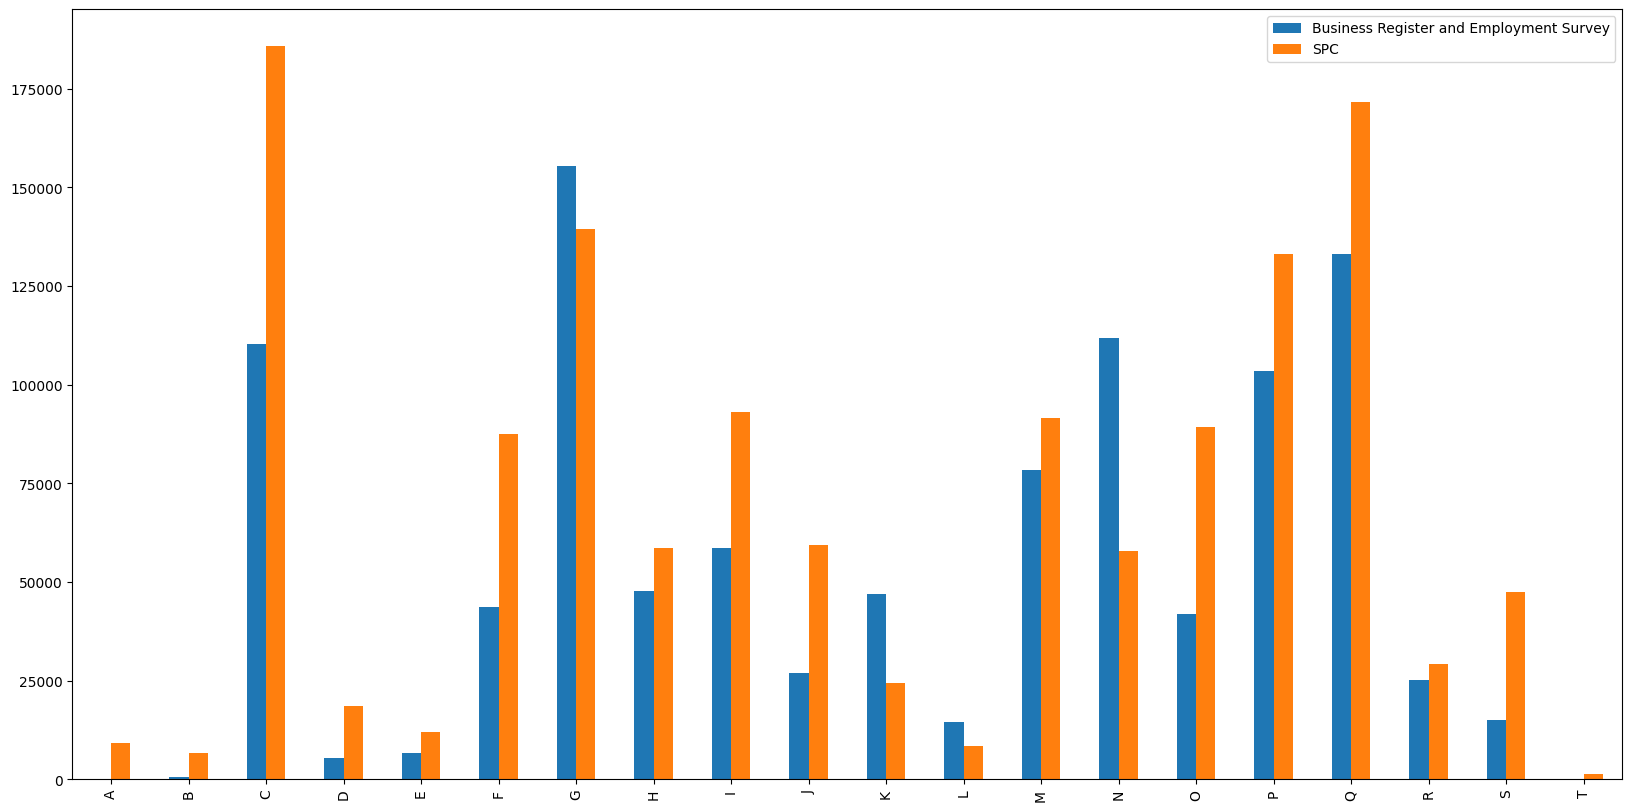

In [11]:
# plot the distribution of SIC codes in the SPC data and the Business Register and Employment Survey data
df = pd.DataFrame([west_yorksire_employment,sic1d2007]).drop(columns="U")
df1 = df.T
df1.plot.bar(figsize=(20,10))

# Generating OD matrics for the SPC dataset 

### What to do 

* Load the spc venues list and extract the coordinate converting to geopandas dataframe
* Generating the OD matrix for SPC homeplace-workplace to match the cencus dataset
* Calculate the travel time based on the travel cost from NTS

In [12]:
# Load the SPC workplace list
path = "../data/external/spc_output_no_sic_code_matching/raw/"
region = "west-yorkshire"
spc = Reader(path, region, backend="pandas", input_type="parquet")
workplace_list=spc.venues_per_activity.copy()
workplace_list

,id,activity,location,urn
0,0,0,"{'longitude': -2.3727805614471436, 'latitude':...",None
1,1,0,"{'longitude': -2.1356043815612793, 'latitude':...",None
2,2,0,"{'longitude': -1.877126693725586, 'latitude': ...",None
3,3,0,"{'longitude': -1.6319984197616577, 'latitude':...",None
4,4,0,"{'longitude': -1.6333471536636353, 'latitude':...",None
...,...,...,...,...
83819,83390,4,"{'longitude': -1.5308599472045898, 'latitude':...",None
83820,83391,4,"{'longitude': -1.5308599472045898, 'latitude':...",None
83821,83392,4,"{'longitude': -1.5335999727249146, 'latitude':...",None
83822,83393,4,"{'longitude': -1.5308599472045898, 'latitude':...",None


In [13]:
# Get the geometry of the workplaces from the location column

workplace_list["geometry"]=workplace_list['location'].apply(lambda loc: Point(loc['longitude'], loc['latitude']))
workplace_gdf = gpd.GeoDataFrame(workplace_list, geometry='geometry',crs="EPSG:4326")
workplace_gdf=workplace_gdf.to_crs("EPSG:27700")


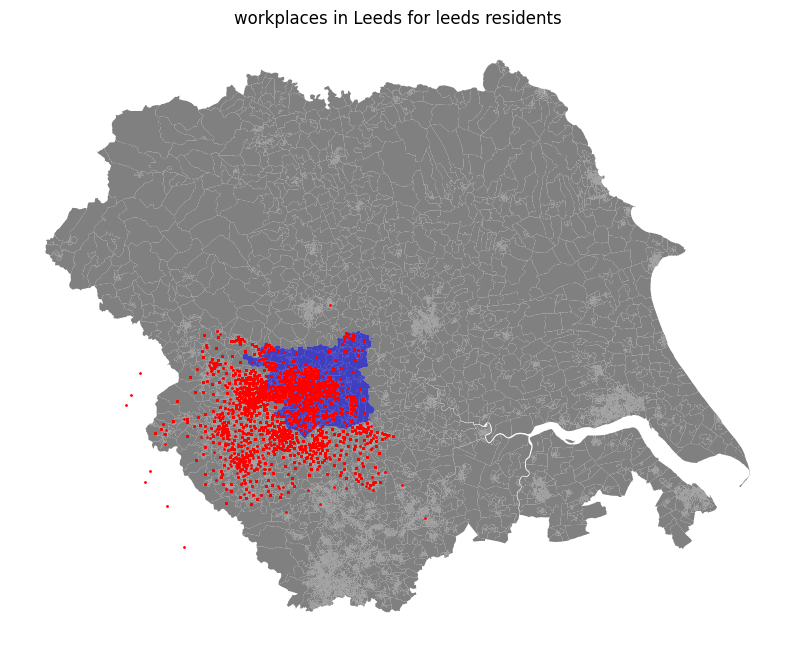

In [14]:
# plot the workplaces in Leeds

fig, ax = plt.subplots(figsize=(10, 8))
plt.axis('off')
Yorkshire_and_Humber_boundaries.plot(ax=ax, color='gray')
Leeds_boundaries.plot(ax=ax, color='blue', alpha=0.5)
#Yorkshire_and_Humber_boundaries.centroid.plot(ax=ax,color="blue",markersize=1)
workplace_gdf[workplace_gdf.id.isin(leeds_spc_people_hh.workplace.unique())].plot(ax=ax, color='red', markersize=1)
plt.title('workplaces in Leeds for leeds residents')
plt.show()

In [15]:
# Add MSOAs code to the workplace list by spatial join
workplace_gdf = gpd.sjoin(workplace_gdf, Yorkshire_and_Humber_boundaries[["MSOA21CD","OA21CD","geometry"]], how='left', predicate='within').drop(columns="index_right")

In [16]:
#lookup the fit from msoa11cd to msoa21cd to match the SPC data
MSOA_11_to_21=pd.read_csv("../data/external/MSOA_(2011)_to_MSOA_(2021)_to_Local_Authority_District_(2022)_Lookup_for_England_and_Wales_-1574171694243467521.csv")
MSOA_11_to_21.set_index("MSOA21CD",inplace=True)


In [17]:
workplace_gdf.index=workplace_gdf["id"]
workplace_gdf=workplace_gdf.join(MSOA_11_to_21, on="MSOA21CD", how="left")
workplace_gdf

,id,activity,location,urn,geometry,MSOA21CD,OA21CD,MSOA11CD,MSOA11NM,CHGIND,MSOA21NM,LAD22CD,LAD22NM,LAD22NMW,ObjectId
id,,,,,,,,,,,,,,,
0,0,0,"{'longitude': -2.3727805614471436, 'latitude':...",None,POINT (375518.969 428982.936),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,"{'longitude': -2.1356043815612793, 'latitude':...",None,POINT (391126.000 412853.062),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,"{'longitude': -1.877126693725586, 'latitude': ...",None,POINT (408207.000 424277.102),E02002259,E00055310,E02002259,Calderdale 016,U,Calderdale 016,E08000033,Calderdale,NaN,2173.0
3,3,0,"{'longitude': -1.6319984197616577, 'latitude':...",None,POINT (424396.809 422066.959),E02002287,E00175514,E02002287,Kirklees 017,U,Kirklees 017,E08000034,Kirklees,NaN,2255.0
4,4,0,"{'longitude': -1.6333471536636353, 'latitude':...",None,POINT (424311.249 421387.863),E02002294,E00056720,E02002294,Kirklees 024,U,Kirklees 024,E08000034,Kirklees,NaN,2262.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83390,83390,4,"{'longitude': -1.5308599472045898, 'latitude':...",None,POINT (431010.950 431810.070),E02006876,E00187081,E02006876,Leeds 112,U,Leeds 112,E08000035,Leeds,NaN,6604.0
83391,83391,4,"{'longitude': -1.5308599472045898, 'latitude':...",None,POINT (431010.950 431810.070),E02006876,E00187081,E02006876,Leeds 112,U,Leeds 112,E08000035,Leeds,NaN,6604.0
83392,83392,4,"{'longitude': -1.5335999727249146, 'latitude':...",None,POINT (430826.091 432465.456),E02006876,E00170264,E02006876,Leeds 112,U,Leeds 112,E08000035,Leeds,NaN,6604.0


In [18]:
# extract the OA and MSOA code for the workplaces to join with the SPC data

Work_OA_list=workplace_gdf["OA21CD"]
Work_OA_list.name="Work_OA21CD"
Work_MSOA21CD_list=workplace_gdf["MSOA21CD"]
Work_MSOA21CD_list.name="Work_MSOA21CD"
Work_MSOA11CD_list=workplace_gdf["MSOA11CD"]
Work_MSOA11CD_list.name="Work_MSOA11CD"


In [19]:
# Join the workplace list MSOA codes with the SPC data
spc_people_hh=spc_people_hh.join(Work_MSOA11CD_list,on="workplace",how="left")
spc_people_hh=spc_people_hh.join(Work_OA_list,on="workplace",how="left")
spc_people_hh

,id,household,workplace,events,weekday_diaries,weekend_diaries,orig_pid,id_tus_hh,id_tus_p,pid_hs,...,num_rooms,central_heat,tenure,num_cars,sex,age_years,ethnicity,nssec8_household,Work_MSOA11CD,Work_OA21CD
0,0,0,NaN,"{'sport': 0.09000000357627869, 'rugby': 0.1133...","[1583, 13161]","[1582, 13160]",E02002183_0001_001,11291218,1,2905399,...,2.0,True,2.0,2,1,86,1,1.0,NaN,NaN
1,1,1,NaN,"{'sport': 0.23899999260902405, 'rugby': 0.3011...","[2900, 4948, 4972, 7424, 10284, 10586, 12199, ...","[2901, 4949, 4973, 7425, 10285, 10585, 12198, ...",E02002183_0002_001,17291219,1,2905308,...,6.0,True,2.0,2,1,74,3,1.0,NaN,NaN
2,2,1,NaN,"{'sport': 0.23899999260902405, 'rugby': 0.1768...","[3010, 6389, 9448, 10184, 11598]","[3011, 6388, 9447, 10183, 11599]",E02002183_0002_002,17070713,2,2907681,...,6.0,True,2.0,2,2,68,1,2.0,NaN,NaN
3,3,2,64060.0,"{'sport': 0.2329999953508377, 'rugby': 0.14678...","[366, 867, 2096, 3678, 5212, 5450, 8145, 9254,...","[365, 868, 2097, 3677, 5213, 5451, 8146, 9253,...",E02002183_0003_001,20310313,1,2902817,...,6.0,True,2.0,1,1,27,1,4.0,E02002424,E00058064
4,4,2,NaN,"{'sport': 0.2329999953508377, 'rugby': 0.08620...","[1289, 12528, 12870]","[1288, 12529, 12871]",E02002183_0003_002,13010909,3,2900884,...,6.0,True,2.0,1,2,26,1,6.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339926,2339926,963456,83347.0,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[253, 904, 960, 1258, 1666, 1827, 2990, 3158, ...","[252, 903, 961, 1259, 1667, 1826, 2991, 3159, ...",E02006876_3658_001,15171109,2,2910202,...,6.0,True,1.0,1,1,39,1,3.0,E02006876,E00057830
2339927,2339927,963457,NaN,"{'sport': 0.27900001406669617, 'rugby': 0.1032...","[1611, 2074, 3331, 3973, 5305, 7241, 9500, 10413]","[1610, 2075, 3330, 3974, 5304, 7240, 9499, 10412]",E02006876_3659_001,12080913,2,2903691,...,5.0,False,1.0,0,2,51,1,7.0,NaN,NaN
2339928,2339928,963458,NaN,"{'sport': 0.18799999356269836, 'rugby': 0.1184...","[1768, 1833, 2004, 3538, 5690, 5693, 9177, 112...","[1767, 1832, 2005, 3537, 5691, 5692, 9176, 112...",E02006876_3660_001,15291209,1,2905917,...,2.0,True,5.0,0,1,82,1,NaN,NaN,NaN
2339929,2339929,963459,NaN,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[2173, 14404, 15340, 16376]","[2174, 14403, 15339, 16377]",E02006876_3661_001,20280416,1,2907191,...,3.0,True,5.0,0,1,38,1,2.0,NaN,NaN


In [20]:
leeds_spc_people_hh=leeds_spc_people_hh.join(Work_MSOA21CD_list,on="workplace")
leeds_spc_people_hh=leeds_spc_people_hh.join(Work_OA_list,on="workplace")

In [21]:
OD_matrix=leeds_spc_people_hh.groupby("oa11cd").apply(lambda x: x.value_counts("Work_OA21CD")).reset_index()
Leeds_OD_matrix=OD_matrix[(OD_matrix["oa11cd"].isin(list(Leeds_boundaries.OA21CD))) & (OD_matrix["Work_OA21CD"].isin(list(Leeds_boundaries.OA21CD)))]
Leeds_OD_matrix

/var/folders/jl/8nv_1f6915lct8qfk5b81hx80000gn/T/ipykernel_67582/2604474626.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  OD_matrix=leeds_spc_people_hh.groupby("oa11cd").apply(lambda x: x.value_counts("Work_OA21CD")).reset_index()


,oa11cd,Work_OA21CD,count
0,E00056750,E00058309,8
1,E00056750,E00056752,7
2,E00056750,E00056756,7
3,E00056750,E00058332,4
4,E00056750,E00187137,4
...,...,...,...
89641,E00170890,E00058866,1
89642,E00170890,E00058565,1
89643,E00170890,E00057614,1
89644,E00170890,E00057328,1


In [22]:
travel_times = pd.read_parquet('../data/external/travel_times/oa/travel_time_matrix_acbm.parquet')
travel_times.head(10)

,from_id,to_id,travel_time_p25,travel_time_p50,travel_time_p75,combination
0,53507,53507,0,0.0,0.0,pt_wkday_morning
1,53507,53508,24,29.0,34.0,pt_wkday_morning
2,53507,53509,17,22.0,27.0,pt_wkday_morning
3,53507,53510,12,14.0,16.0,pt_wkday_morning
4,53507,53511,14,16.0,18.0,pt_wkday_morning
5,53507,53512,10,10.0,10.0,pt_wkday_morning
6,53507,53513,11,13.0,15.0,pt_wkday_morning
7,53507,53514,23,25.0,28.0,pt_wkday_morning
8,53507,53515,31,36.0,41.0,pt_wkday_morning
9,53507,53516,34,39.0,44.0,pt_wkday_morning


In [23]:
# convert from_id and to_id to int to match the boundaries data type
travel_times = travel_times.astype({'from_id': int, 'to_id': int})

# merge travel_times with boundaries
travel_times = travel_times.merge(boundaries[['OBJECTID', 'OA21CD']], left_on='from_id', right_on='OBJECTID', how='left')
travel_times = travel_times.drop(columns='OBJECTID')

travel_times = travel_times.merge(boundaries[['OBJECTID', 'OA21CD']], left_on='to_id', right_on='OBJECTID', how='left', suffixes=('_from', '_to'))
travel_times = travel_times.drop(columns='OBJECTID')

travel_times.dropna(how="any")

travel_times.head(10)

,from_id,to_id,travel_time_p25,travel_time_p50,travel_time_p75,combination,OA21CD_from,OA21CD_to
0,53507,53507,0,0.0,0.0,pt_wkday_morning,E00056750,E00056750
1,53507,53508,24,29.0,34.0,pt_wkday_morning,E00056750,E00056751
2,53507,53509,17,22.0,27.0,pt_wkday_morning,E00056750,E00056752
3,53507,53510,12,14.0,16.0,pt_wkday_morning,E00056750,E00056753
4,53507,53511,14,16.0,18.0,pt_wkday_morning,E00056750,E00056754
5,53507,53512,10,10.0,10.0,pt_wkday_morning,E00056750,E00056755
6,53507,53513,11,13.0,15.0,pt_wkday_morning,E00056750,E00056756
7,53507,53514,23,25.0,28.0,pt_wkday_morning,E00056750,E00056757
8,53507,53515,31,36.0,41.0,pt_wkday_morning,E00056750,E00056758
9,53507,53516,34,39.0,44.0,pt_wkday_morning,E00056750,E00056759


In [24]:
# Generating the commuting matrix
leeds_spc_people_hh_work=leeds_spc_people_hh[~leeds_spc_people_hh["workplace"].isna()]
leeds_spc_people_hh_work=leeds_spc_people_hh_work.rename(columns={"oa11cd":"OA21CD_from","Work_OA21CD":"OA21CD_to"})
leeds_spc_people_hh_work

,id,household,workplace,events,weekday_diaries,weekend_diaries,orig_pid,id_tus_hh,id_tus_p,pid_hs,...,num_rooms,central_heat,tenure,num_cars,sex,age_years,ethnicity,nssec8_household,Work_MSOA21CD,OA21CD_to
1192985,1192985,479312,41330.0,"{'sport': 0.2680000066757202, 'rugby': 0.19832...","[318, 3145, 10496, 12819, 13943]","[319, 3144, 10495, 12818, 13942]",E02002330_0003_002,20090607,1,2909582,...,6.0,True,2.0,1,2,56,1,1.0,E02002331,E00170593
1192990,1192990,479314,41240.0,"{'sport': 0.27900001406669617, 'rugby': 0.2064...","[2746, 3667, 6718, 9441, 10161, 11869, 13638, ...","[2747, 3668, 6719, 9442, 10162, 11868, 13639, ...",E02002330_0005_002,52051016,2,2901384,...,5.0,True,2.0,1,2,51,1,2.0,E02002331,E00187086
1192992,1192992,479315,41103.0,"{'sport': 0.2680000066757202, 'rugby': 0.16884...","[877, 1139, 2067, 2282, 4320, 4556, 6217, 6940...","[878, 1138, 2066, 2283, 4319, 4557, 6216, 6939...",E02002330_0006_001,11151212,1,2906244,...,6.0,True,1.0,1,1,56,1,6.0,E02002331,E00059025
1192993,1192993,479315,40385.0,"{'sport': 0.2680000066757202, 'rugby': 0.19832...","[818, 825, 2201, 2707, 3259, 4190, 4866, 5517,...","[817, 826, 2200, 2706, 3258, 4189, 4867, 5516,...",E02002330_0006_002,16081219,2,2905273,...,6.0,True,1.0,1,2,55,1,3.0,E02002330,E00059024
1192994,1192994,479316,48738.0,"{'sport': 0.2549999952316284, 'rugby': 0.16064...","[1796, 2877, 4451, 5231, 5497, 6073, 6593, 669...","[1795, 2876, 4452, 5230, 5496, 6072, 6592, 669...",E02002330_0007_001,13291204,2,2907891,...,6.0,True,4.0,1,1,44,1,6.0,E02002359,E00056950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339919,2339919,963451,83335.0,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[253, 904, 960, 1258, 1666, 1827, 2990, 3158, ...","[252, 903, 961, 1259, 1667, 1826, 2991, 3159, ...",E02006876_3653_001,18050107,1,2904140,...,4.0,True,5.0,1,1,38,1,3.0,E02006876,E00187081
2339920,2339920,963451,78598.0,"{'sport': 0.2329999953508377, 'rugby': 0.17241...","[337, 485, 987, 3007, 3020, 3185, 3385, 5493, ...","[338, 486, 986, 3006, 3021, 3184, 3384, 5492, ...",E02006876_3653_002,53051001,2,2901241,...,4.0,True,5.0,1,2,25,1,2.0,E02006875,E00187029
2339921,2339921,963452,83386.0,"{'sport': 0.25699999928474426, 'rugby': 0.1901...","[5633, 15844]","[5632, 15845]",E02006876_3654_001,14260118,1,2908377,...,5.0,True,1.0,1,2,22,2,1.0,E02006876,E00187081
2339926,2339926,963456,83347.0,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[253, 904, 960, 1258, 1666, 1827, 2990, 3158, ...","[252, 903, 961, 1259, 1667, 1826, 2991, 3159, ...",E02006876_3658_001,15171109,2,2910202,...,6.0,True,1.0,1,1,39,1,3.0,E02006876,E00057830


In [25]:
# Join the commuting data with the travel times

leeds_spc_people_hh_work_with_time = pd.merge(leeds_spc_people_hh_work, travel_times.dropna(how="any"),  how='left', left_on=['OA21CD_from','OA21CD_to'], right_on = ['OA21CD_from','OA21CD_to'])
leeds_spc_people_hh_work_with_time=leeds_spc_people_hh_work_with_time[~leeds_spc_people_hh_work_with_time["travel_time_p50"].isna()]
leeds_spc_people_hh_work_with_time=leeds_spc_people_hh_work_with_time[leeds_spc_people_hh_work_with_time['travel_time_p25']>0]
leeds_spc_people_hh_work_with_time=leeds_spc_people_hh_work_with_time.drop_duplicates("id")

array([[<Axes: title={'center': 'travel_time_p50'}>]], dtype=object)

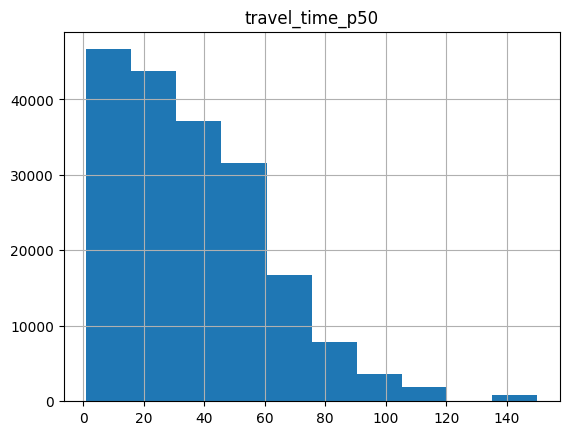

In [26]:
leeds_spc_people_hh_work_with_time.hist("travel_time_p50")

In [27]:
leeds_spc_people_hh_work_with_time

,id,household,workplace,events,weekday_diaries,weekend_diaries,orig_pid,id_tus_hh,id_tus_p,pid_hs,...,ethnicity,nssec8_household,Work_MSOA21CD,OA21CD_to,from_id,to_id,travel_time_p25,travel_time_p50,travel_time_p75,combination
0,1192985,479312,41330.0,"{'sport': 0.2680000066757202, 'rugby': 0.19832...","[318, 3145, 10496, 12819, 13943]","[319, 3144, 10495, 12818, 13942]",E02002330_0003_002,20090607,1,2909582,...,1,1.0,E02002331,E00170593,55641.0,160913.0,89.0,150.0,150.0,pt_wkday_evening
3,1192990,479314,41240.0,"{'sport': 0.27900001406669617, 'rugby': 0.2064...","[2746, 3667, 6718, 9441, 10161, 11869, 13638, ...","[2747, 3668, 6719, 9442, 10162, 11868, 13639, ...",E02002330_0005_002,52051016,2,2901384,...,1,2.0,E02002331,E00187086,55653.0,175097.0,27.0,54.0,59.0,pt_wkday_morning
10,1192992,479315,41103.0,"{'sport': 0.2680000066757202, 'rugby': 0.16884...","[877, 1139, 2067, 2282, 4320, 4556, 6217, 6940...","[878, 1138, 2066, 2283, 4319, 4557, 6216, 6939...",E02002330_0006_001,11151212,1,2906244,...,1,6.0,E02002331,E00059025,55647.0,55644.0,6.0,6.0,6.0,car
12,1192993,479315,40385.0,"{'sport': 0.2680000066757202, 'rugby': 0.19832...","[818, 825, 2201, 2707, 3259, 4190, 4866, 5517,...","[817, 826, 2200, 2706, 3258, 4189, 4867, 5516,...",E02002330_0006_002,16081219,2,2905273,...,1,3.0,E02002330,E00059024,55647.0,55643.0,37.0,42.0,47.0,pt_wkday_morning
20,1192994,479316,48738.0,"{'sport': 0.2549999952316284, 'rugby': 0.16064...","[1796, 2877, 4451, 5231, 5497, 6073, 6593, 669...","[1795, 2876, 4452, 5230, 5496, 6072, 6592, 669...",E02002330_0007_001,13291204,2,2907891,...,1,6.0,E02002359,E00056950,55647.0,53694.0,26.0,26.0,26.0,car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302358,2339919,963451,83335.0,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[253, 904, 960, 1258, 1666, 1827, 2990, 3158, ...","[252, 903, 961, 1259, 1667, 1826, 2991, 3159, ...",E02006876_3653_001,18050107,1,2904140,...,1,3.0,E02006876,E00187081,54520.0,175092.0,15.0,16.0,18.0,pt_wkday_morning
1302366,2339920,963451,78598.0,"{'sport': 0.2329999953508377, 'rugby': 0.17241...","[337, 485, 987, 3007, 3020, 3185, 3385, 5493, ...","[338, 486, 986, 3006, 3021, 3184, 3384, 5492, ...",E02006876_3653_002,53051001,2,2901241,...,1,2.0,E02006875,E00187029,54520.0,175040.0,15.0,17.0,18.0,pt_wkday_morning
1302374,2339921,963452,83386.0,"{'sport': 0.25699999928474426, 'rugby': 0.1901...","[5633, 15844]","[5632, 15845]",E02006876_3654_001,14260118,1,2908377,...,2,1.0,E02006876,E00187081,54482.0,175092.0,22.0,44.0,49.0,pt_wkday_morning
1302379,2339926,963456,83347.0,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[253, 904, 960, 1258, 1666, 1827, 2990, 3158, ...","[252, 903, 961, 1259, 1667, 1826, 2991, 3159, ...",E02006876_3658_001,15171109,2,2910202,...,1,3.0,E02006876,E00057830,54491.0,54523.0,33.0,38.0,43.0,pt_wkday_morning


In [28]:
leeds_spc_people_hh_work_with_time=leeds_spc_people_hh_work_with_time[["OA21CD_from","OA21CD_to","travel_time_p50"]].dropna(how='any')
leeds_spc_people_hh_work_with_time.groupby("OA21CD_from").apply(lambda x: x.value_counts("OA21CD_to")).reset_index()

/var/folders/jl/8nv_1f6915lct8qfk5b81hx80000gn/T/ipykernel_67582/3065115914.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  leeds_spc_people_hh_work_with_time.groupby("OA21CD_from").apply(lambda x: x.value_counts("OA21CD_to")).reset_index()


,OA21CD_from,OA21CD_to,count
0,E00056750,E00058309,8
1,E00056750,E00056752,7
2,E00056750,E00056756,7
3,E00056750,E00058332,4
4,E00056750,E00187137,4
...,...,...,...
71348,E00170890,E00058866,1
71349,E00170890,E00058565,1
71350,E00170890,E00057614,1
71351,E00170890,E00057328,1


In [29]:
MSOA_travel_time=leeds_spc_people_hh_work_with_time.drop(columns="OA21CD_to").groupby("OA21CD_from").agg("mean")

In [30]:
MSOA_travel_time

,travel_time_p50
OA21CD_from,
E00056750,32.103448
E00056751,54.339286
E00056752,45.672414
E00056753,32.421875
E00056754,33.800000
...,...
E00170623,28.104478
E00170887,41.693642
E00170888,19.052632


# Validation the SPC workplace with 2011 Cencus data

In this section, we are calculating different indicators for the modelling, validating the model against census data 

This section links to the PR [#17](https://github.com/Urban-Analytics-Technology-Platform/acbm/issues/17)

### What to do 

* Check if the total amount of the workplace assigned and the percentage in the SPC dataset
* Check if the distribution of SIC code for SPC dataset and BRES dataset can be matched with each other

<Axes: >

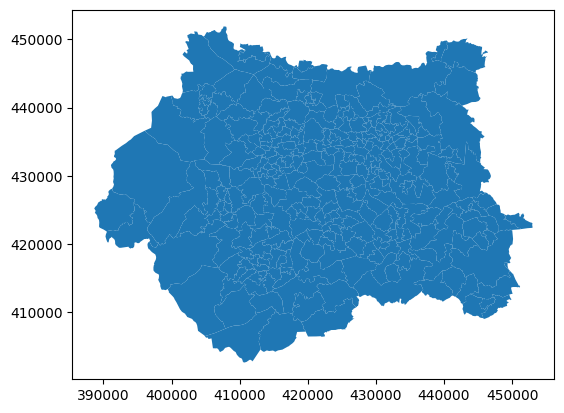

In [33]:
#Read in the MSOA boundaries downloaded from the ONS website
MSOA_boundaries=gpd.read_file("../data/external/boundaries/MSOA_EngWal_Dec_2011_Generalised_ClippedEW_0/Middle_Layer_Super_Output_Areas_December_2011_Generalised_Clipped_Boundaries_in_England_and_Wales.shp")
West_yorkshire_MSOA=MSOA_boundaries[MSOA_boundaries["msoa11cd"].isin(cencus_od_MSOA.Home_MSOA.unique())]
West_yorkshire_MSOA.plot()

The cencus data is from 2011 ceuncus dataset WF02EW - Location of usual residence and place of work (with outside UK collapsed) (OA/WPZ level),the data is downloaded from the nomis website: https://www.nomisweb.co.uk/query/construct/summary.asp?menuopt=200&subcomp=

In [49]:
#Read in the cencus data
#
cencus_od_MSOA=pd.read_csv("../data/external/272602795290669.csv",skiprows=9,skipfooter=8,engine="python")
cencus_od_MSOA.rename(columns={' ':"MSOA_name",' .1':"Home_MSOA"},inplace=True)
cencus_od_MSOA.drop(columns="MSOA_name",inplace=True)
#cencus_od_MSOA=cencus_od_MSOA.set_index("MSOA_code").drop(columns="MSOA_name")

cencus_od_MSOA

,Home_MSOA,E02002183,E02002184,E02002185,E02002186,E02002187,E02002188,E02002189,E02002190,E02002191,...,E02002473,E02002474,E02002475,E02002476,E02002477,E02002478,E02002479,E02002480,E02002481,E02002482
0,E02002183,168,332,16,86,12,10,5,40,10,...,0,0,0,0,0,0,0,0,0,0
1,E02002184,205,1084,85,117,18,15,8,68,12,...,1,0,0,1,0,0,0,0,0,0
2,E02002185,47,240,210,30,26,9,6,41,1,...,1,0,1,0,0,0,0,0,0,0
3,E02002186,90,217,12,1368,7,94,72,466,84,...,0,0,0,0,0,0,0,0,0,0
4,E02002187,31,141,51,20,104,8,4,19,2,...,1,0,0,0,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,E02002478,0,0,0,0,0,0,0,0,0,...,4,3,1,29,9,147,64,132,392,25
295,E02002479,0,0,0,0,0,0,1,1,0,...,6,8,12,136,26,11,537,114,245,36
296,E02002480,0,0,0,0,0,0,0,0,0,...,5,1,1,29,8,19,72,344,512,49
297,E02002481,1,0,0,0,0,0,0,0,0,...,4,0,2,27,5,16,69,319,666,48


The travel cost for this initial version only considers Euclidean distance, but the travel time could be added in the further update.

In [34]:
#calculate_distance_matrix
West_yorkshire_MSOA.set_index('msoa11cd', inplace=True)
distances = West_yorkshire_MSOA.rename_axis('Orig').centroid.apply(lambda x: West_yorkshire_MSOA.rename_axis('Dest').centroid.distance(x)).stack().reset_index()
distances.rename(columns = {0:'Dist'}, inplace=True)
distances

,Orig,Dest,Dist
0,E02002183,E02002183,0.000000
1,E02002183,E02002184,2735.304013
2,E02002183,E02002185,7235.696937
3,E02002183,E02002186,4876.409902
4,E02002183,E02002187,6938.273942
...,...,...,...
89396,E02006876,E02002482,23757.088813
89397,E02006876,E02006852,7882.153901
89398,E02006876,E02006861,5685.897394
89399,E02006876,E02006875,2992.701978


In [35]:
# melt the cencus data to long format
cencus_od_MSOA_long = pd.melt(cencus_od_MSOA, id_vars="Home_MSOA",var_name='Workplace_MSOA', value_name='flow_Census')
cencus_od_MSOA_long

,Home_MSOA,Workplace_MSOA,flow_Census
0,E02002183,E02002183,168
1,E02002184,E02002183,205
2,E02002185,E02002183,47
3,E02002186,E02002183,90
4,E02002187,E02002183,31
...,...,...,...
89396,E02002478,E02002482,25
89397,E02002479,E02002482,36
89398,E02002480,E02002482,49
89399,E02002481,E02002482,48


In [36]:
# SPC OD matrix is generated by counting the number of people in each MSOA that work in another MSOA from the SPC data
# (22nd July 2024)The current SPC data is from no-SIC code matching version
SPC_OD_matrix=spc_people_hh.groupby("msoa11cd").apply(lambda x: x.value_counts("Work_MSOA11CD")).reset_index()
SPC_OD_matrix.rename(columns={"msoa11cd":"Home_MSOA","Work_MSOA11CD":"Workplace_MSOA","count":"flow_SPC"},inplace=True)
SPC_OD_matrix

/var/folders/jl/8nv_1f6915lct8qfk5b81hx80000gn/T/ipykernel_67582/2472547481.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  SPC_OD_matrix=spc_people_hh.groupby("msoa11cd").apply(lambda x: x.value_counts("Work_MSOA11CD")).reset_index()


,Home_MSOA,Workplace_MSOA,flow_SPC
0,E02002183,E02002183,946
1,E02002183,E02002184,605
2,E02002183,E02006875,78
3,E02002183,E02002190,75
4,E02002183,E02002251,50
...,...,...,...
47007,E02006876,E02002401,1
47008,E02006876,E02002280,1
47009,E02006876,E02002262,1
47010,E02006876,E02002408,1


In [37]:
df_comparison=pd.merge(cencus_od_MSOA_long,SPC_OD_matrix,how="left",left_on=["Home_MSOA","Workplace_MSOA"],right_on=["Home_MSOA","Workplace_MSOA"]).fillna(0)
distances.rename(columns={"Orig":"Home_MSOA","Dest":"Workplace_MSOA"},inplace=True)
df_comparison=df_comparison.join(distances.set_index(["Home_MSOA","Workplace_MSOA"]),on=["Home_MSOA","Workplace_MSOA"],how="left")
df_comparison

,Home_MSOA,Workplace_MSOA,flow_Census,flow_SPC,Dist
0,E02002183,E02002183,168,946.0,0.000000
1,E02002184,E02002183,205,286.0,2735.304013
2,E02002185,E02002183,47,87.0,7235.696937
3,E02002186,E02002183,90,205.0,4876.409902
4,E02002187,E02002183,31,41.0,6938.273942
...,...,...,...,...,...
89396,E02002478,E02002482,25,26.0,4496.295948
89397,E02002479,E02002482,36,51.0,2758.318456
89398,E02002480,E02002482,49,41.0,2022.381831
89399,E02002481,E02002482,48,61.0,3313.764601


For assessing the goodness of fitting, we firstly use statistical method for calculating the Mean Square Error (MSE), Mean Absolute Error (MAE), Root Mean Square Error (RMSE) and R-square (R2) compared with the observed flow, the results are represented below

In [39]:
sum(df_comparison["flow_Census"])
sum(df_comparison["flow_SPC"])
print("Census counts:",sum(df_comparison["flow_Census"]),"\nCurrent SPC counts:",int(sum(df_comparison["flow_SPC"])))

r2=np.corrcoef(df_comparison["flow_Census"],df_comparison["flow_SPC"])[0,1]**2
print("The R^2 value is: ",r2)

rmse=np.sqrt(np.mean((df_comparison["flow_Census"]-df_comparison["flow_SPC"])**2))
print("The RMSE value is: ",rmse)

mes=np.mean(np.abs(df_comparison["flow_Census"]-df_comparison["flow_SPC"]))
print("The MAE value is: ",mes)

Census counts: 783428 
Current SPC counts: 677216
The R^2 value is:  0.660057237701492
The RMSE value is:  34.360392786344164
The MAE value is:  6.421024373329157


The average travel cost of each trip is another indicator to assess the similarity of two OD flows 

In [ ]:
#average distance calcuation
SPC_distance= sum(df_comparison["flow_SPC"]*df_comparison["Dist"]) / sum(df_comparison["flow_SPC"])
Census_distance= sum(df_comparison["flow_Census"]*df_comparison["Dist"]) / sum(df_comparison["flow_Census"])
print("SPC average travel distance",SPC_distance,"\n Census average travel distance",Census_distance)

By referencing the QUANT models' validating method by Mike Batty, we are mapping the local distance to observe if the modelling method has significant spatial heterogeneity.

/var/folders/jl/8nv_1f6915lct8qfk5b81hx80000gn/T/ipykernel_67582/3839109177.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  SPC_distance_MSOA=df_comparison.groupby("Home_MSOA").apply(lambda x: sum(x["flow_SPC"]*x["Dist"]) / sum(x["flow_SPC"])).reset_index()
/var/folders/jl/8nv_1f6915lct8qfk5b81hx80000gn/T/ipykernel_67582/3839109177.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Census_distance_MSOA

<Axes: title={'center': 'Average travel distance difference between SPC and Census'}>

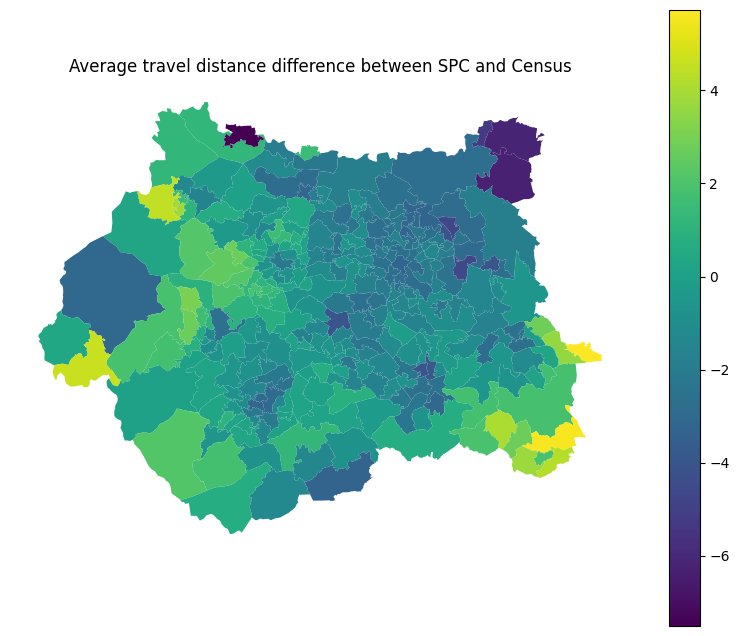

In [40]:
# map travel distance differences
SPC_distance_MSOA=df_comparison.groupby("Home_MSOA").apply(lambda x: sum(x["flow_SPC"]*x["Dist"]) / sum(x["flow_SPC"])).reset_index()
Census_distance_MSOA=df_comparison.groupby("Home_MSOA").apply(lambda x: sum(x["flow_Census"]*x["Dist"]) / sum(x["flow_Census"])).reset_index()
average_distance_MSOA=pd.merge(SPC_distance_MSOA,Census_distance_MSOA,how="left",on="Home_MSOA")
average_distance_MSOA.rename(columns={"0_x":"SPC_distance","0_y":"Census_distance"},inplace=True)
average_distance_MSOA

#plot the differences
average_distance_MSOA["Difference"]=(average_distance_MSOA["SPC_distance"]-average_distance_MSOA["Census_distance"])/1000
average_distance_MSOA.set_index("Home_MSOA",inplace=True)
average_distance_MSOA=West_yorkshire_MSOA.join(average_distance_MSOA)
fig, ax = plt.subplots(figsize=(10, 8))
plt.axis('off')
plt.title('Average travel distance difference between SPC and Census')
average_distance_MSOA.plot(column="Difference",legend=True,figsize=(10,10),ax=ax) 

In [71]:
sum_dj =df_comparison.groupby("Workplace_MSOA").agg({"flow_Census":"sum","flow_SPC":"sum"})
sum_dj["diff"]=sum_dj["flow_Census"]-sum_dj["flow_SPC"]
sum_dj["diff_percentage"]=sum_dj["diff"]/sum_dj["flow_Census"]
sum_dj["diff_abs"]=abs(sum_dj["diff"])
sum_dj["diff_per_abs"]=abs(sum_dj["diff"])/sum_dj["flow_Census"]


sum_dj

,flow_Census,flow_SPC,diff,diff_percentage,diff_abs,diff_per_abs
Workplace_MSOA,,,,,,
E02002183,1027,2866.0,-1839.0,-1.790652,1839.0,1.790652
E02002184,3611,6576.0,-2965.0,-0.821102,2965.0,0.821102
E02002185,623,797.0,-174.0,-0.279294,174.0,0.279294
E02002186,4768,2778.0,1990.0,0.417366,1990.0,0.417366
E02002187,466,687.0,-221.0,-0.474249,221.0,0.474249
...,...,...,...,...,...,...
E02002482,465,697.0,-232.0,-0.498925,232.0,0.498925
E02006852,3161,2743.0,418.0,0.132237,418.0,0.132237
E02006861,3128,2209.0,919.0,0.293798,919.0,0.293798


*	map flow differences: 
$$
  Q_i=\sum\limits_{j}(T_{ij}-T^{obs}_{ij})
$$

<Axes: title={'center': 'Flow differences between SPC and Census by origin'}>

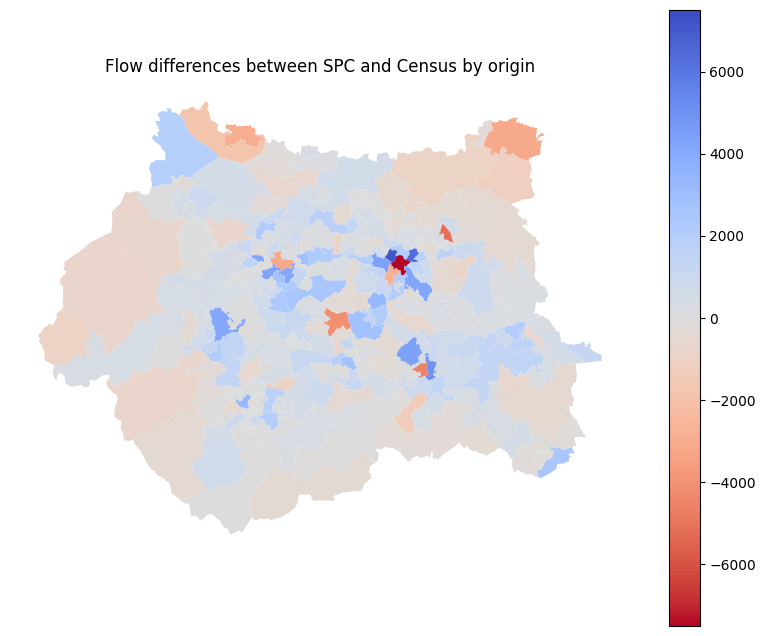

In [74]:
#plot the differences
fig, ax = plt.subplots(figsize=(10, 8))
plt.axis('off')

plt.title('Flow differences between SPC and Census by origin')
#plt.title('Absolute value difference in flow between SPC and Census')
West_yorkshire_MSOA.join(sum_dj,on="msoa11cd").plot(column="diff",ax=ax,legend=True,cmap="coolwarm_r",vmin=-7500,vmax=7500)

array([[<Axes: title={'center': 'diff'}>]], dtype=object)

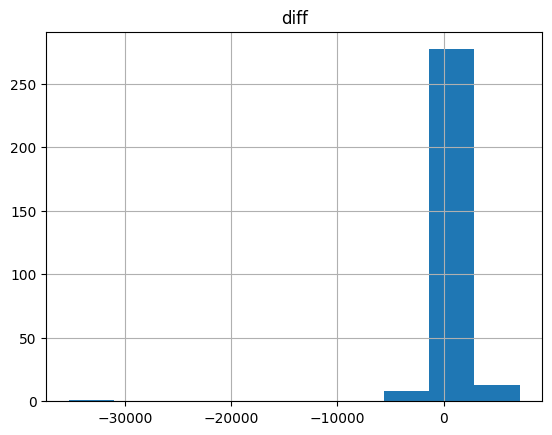

In [57]:
sum_dj.hist("diff")

* •	absolute map flow differences: 

$$
Gi=\sum\limits_{j}(|(T_{ij}-T^{obs}_{ij})|)
$$

<Axes: title={'center': 'Absolute value difference in flow between SPC and Census'}>

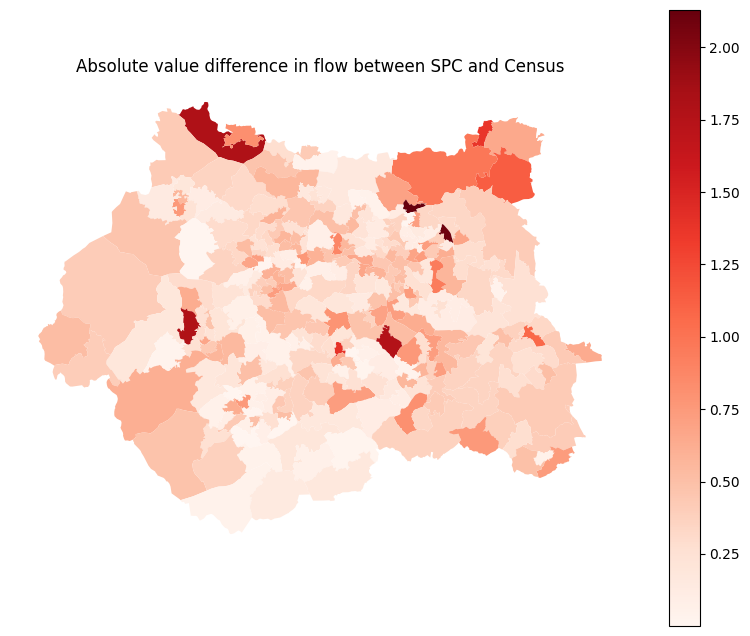

In [69]:
#plot the diff_abs
fig, ax = plt.subplots(figsize=(10, 8))
plt.axis('off')
plt.title('Absolute value difference in flow between SPC and Census')
West_yorkshire_MSOA.join(sum_dj,on="msoa11cd").plot(column="diff_abs",ax=ax,legend=True,cmap="Reds")

array([[<Axes: title={'center': 'diff_abs'}>]], dtype=object)

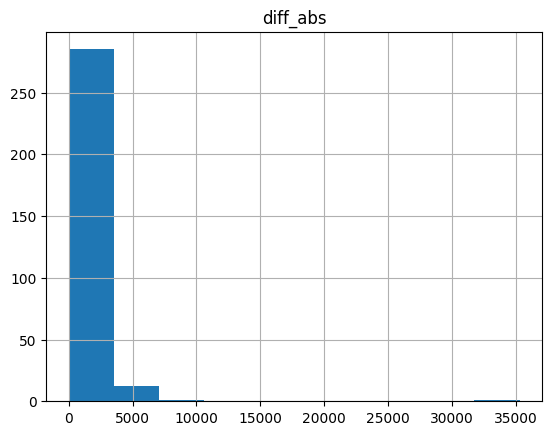

In [75]:
sum_dj.hist("diff_abs")

* % map flow  differences: 

$$
  q_{i}=\sum\limits_{j}((T_{ij}-T^{obs}_{ij})/\sum\limits_{lk} T^{obs}_{lk})
$$


<Axes: title={'center': 'Percentage Difference in flow between SPC and Census'}>

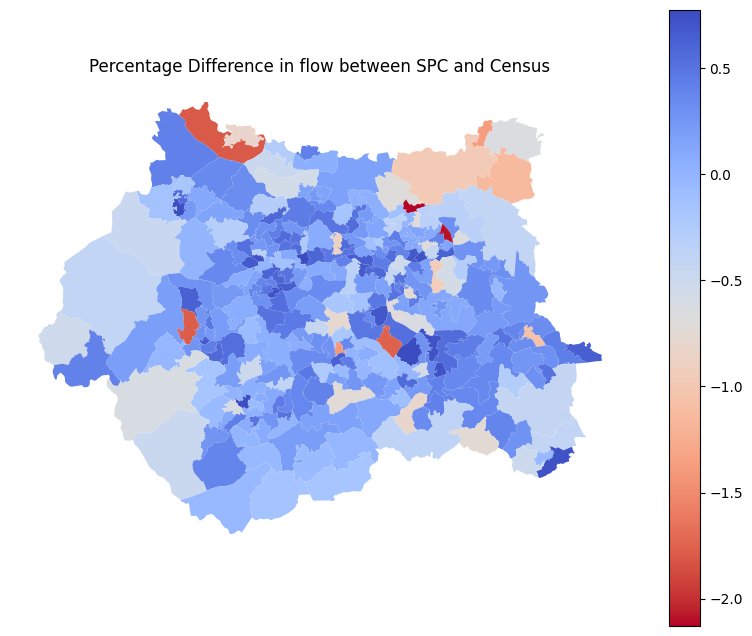

In [63]:
#plot the differences
fig, ax = plt.subplots(figsize=(10, 8))
plt.axis('off')
plt.title('Percentage Difference in flow between SPC and Census')
West_yorkshire_MSOA.join(sum_dj,on="msoa11cd").plot(column="diff_percentage",ax=ax,legend=True,cmap="coolwarm_r")

# Validation the SPC with AcBM data
(To be finished when more data avaliable)

In [64]:
# Read in the spc data (parquet format)
nts_trips = pd.read_parquet('../data/interim/matching/spc_with_nts_trips.parquet')

nts_trips.head()

,id,household,pid_hs,msoa11cd,oa11cd,members,sic1d2007,sic2d2007,pwkstat,salary_yearly,...,tst,tet,TripDisIncSW,TripDisExSW,TripTotalTime,TripTravTime,ozone,dzone,W5,W5xHH
0,25554,11633,2906595,E02002333,E00058361,[25554],P,85.0,4,NaN,...,630.0,660.0,15.0,15.0,30.0,30.0,6.0,6.0,0.903148,1.000000
1,25554,11633,2906595,E02002333,E00058361,[25554],P,85.0,4,NaN,...,615.0,625.0,2.0,2.0,10.0,10.0,6.0,6.0,0.990378,1.096585
2,25554,11633,2906595,E02002333,E00058361,[25554],P,85.0,4,NaN,...,1190.0,1210.0,1.0,1.0,20.0,20.0,6.0,6.0,1.132718,1.254190
3,25554,11633,2906595,E02002333,E00058361,[25554],P,85.0,4,NaN,...,850.0,865.0,2.0,2.0,15.0,15.0,6.0,6.0,1.046158,1.158347
4,25554,11633,2906595,E02002333,E00058361,[25554],P,85.0,4,NaN,...,600.0,615.0,3.0,3.0,15.0,15.0,6.0,6.0,0.903148,1.000000
